# Perform sentimental analysis on the Elon-musk tweets (Elon-musk.csv)

### Sentimental analysis
   Sentiment analysis (or opinion mining) is a natural language processing (NLP) technique used to determine whether data is positive, negative or neutral. Sentiment analysis is often performed on textual data to help businesses monitor brand and product sentiment in customer feedback, and understand customer needs.

### Approches for sentiment analysis

Rule-based approach: Over here, the lexicon method, tokenization, parsing comes in the rule-based. The approach is that count the number of positive and negative words in the given dataset. If the number of positive words is greater than the negative words then the sentiment is positive else vice-versa.

Automatic Approach: This approach works on the machine learning technique. Firstly, the datasets are trained and predictive analysis is done. The next process is the extraction of words from the text is done. This text extraction can be done using different techniques such as Naive Bayes, Linear Regression, Support Vector, Deep Learning like this machine learning techniques are used.

Hybrid Approach: It is the combination of both the above approaches i.e. rule-based and automatic approach. The surplus is that the accuracy is high compared to the other two approaches.

### Types of sentiment analysis
1)Fine-grained sentiment analysis provides a more precise level of polarity by breaking it down into further categories, usually very positive to very negative. This can be considered the opinion equivalent of ratings on a 5-star scale.
    
   2)Emotion detection identifies specific emotions rather than positivity and negativity. Examples could include happiness, frustration, shock, anger and sadness.
    
   3)Intent-based analysis recognizes actions behind a text in addition to opinion. For example, an online comment expressing frustration about changing a battery could prompt customer service to reach out to resolve that specific issue.
    
   4)Aspect-based analysis gathers the specific component being positively or negatively mentioned. For example, a customer might leave a review on a product saying the battery life was too short. Then, the system will return that the negative sentiment is not about the product as a whole, but about the battery life. 

### Challenges with sentiment analysis

Challenges associated with sentiment analysis typically revolve around inaccuracies in training models. Objectivity, or comments with a neutral sentiment, tend to pose a problem for systems and are often misidentified. For example, if a customer received the wrong color item and submitted a comment "The product was blue," this would be identified as neutral when in fact it should be negative. 

Sentiment can also be challenging to identify when systems cannot understand the context or tone. Answers to polls or survey questions like "nothing" or "everything" are hard to categorize when the context is not given, as they could be labeled as positive or negative depending on the question. 

Similarly, irony and sarcasm often cannot be explicitly trained and lead to falsely labeled sentiments

Computer programs also have trouble when encountering emojis and irrelevant information. Special attention needs to be given to training models with emojis and neutral data so as to not improperly flag texts.

In [1]:
#importing necessary libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt #graphical representation
import seaborn as sns

import string # special operations on strings
import spacy # language models

from nltk.corpus import stopwords

from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline

In [2]:
elon = pd.read_csv('Elon_musk.csv', encoding="ISO-8859-1")
elon.drop(columns='Unnamed: 0' , inplace=True)
elon 

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


# Data Exploration 

### No. of words in each tweet 

In [3]:
elon['word_count'] = elon['Text'].apply(lambda x: len(str(x).split(' ')))
elon.head()

,Text,word_count
0,@kunalb11 Im an alien,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated,4
4,@teslacn Congratulations Tesla China for amazi...,17


### No. of stopwords 

In [4]:
stop = stopwords.words('english')
elon['stopword_count']=elon['Text'].apply(lambda x: len([x for x in x.split() if x in stop])) 
elon.head() 

,Text,word_count,stopword_count
0,@kunalb11 Im an alien,4,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,4
2,@joerogan @Spotify Great interview!,4,0
3,@gtera27 Doge is underestimated,4,1
4,@teslacn Congratulations Tesla China for amazi...,17,5


### No. of digits

In [5]:
elon['digits'] = elon['Text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
elon.head()

,Text,word_count,stopword_count,digits
0,@kunalb11 Im an alien,4,1,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,4,0
2,@joerogan @Spotify Great interview!,4,0,0
3,@gtera27 Doge is underestimated,4,1,0
4,@teslacn Congratulations Tesla China for amazi...,17,5,0


In [6]:
elon.digits.value_counts()

0     1854
1      117
2       23
3        3
4        1
10       1
Name: digits, dtype: int64

### No. of URLs 

In [7]:
elon['web_links'] = elon['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('https://')]))
elon.head() 

,Text,word_count,stopword_count,digits,web_links
0,@kunalb11 Im an alien,4,1,0,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,4,0,0
2,@joerogan @Spotify Great interview!,4,0,0,0
3,@gtera27 Doge is underestimated,4,1,0,0
4,@teslacn Congratulations Tesla China for amazi...,17,5,0,0


In [8]:
elon.web_links.value_counts()

0    1356
1     632
2      11
Name: web_links, dtype: int64

### No. of hashtags

In [9]:
elon['hashtag'] = elon['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
elon.head() 

,Text,word_count,stopword_count,digits,web_links,hashtag
0,@kunalb11 Im an alien,4,1,0,0,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,4,0,0,0
2,@joerogan @Spotify Great interview!,4,0,0,0,0
3,@gtera27 Doge is underestimated,4,1,0,0,0
4,@teslacn Congratulations Tesla China for amazi...,17,5,0,0,0


In [10]:
elon.hashtag.value_counts()

0    1990
1       5
2       3
4       1
Name: hashtag, dtype: int64

# Text Preprocessing 

### Collecting tweets

In [11]:
elon = [Text.strip() for Text in elon.Text] # remove both the leading and the trailing characters 

In [12]:
elon = [Text for Text in elon if Text] # removes empty strings, because they are considered in Python as False

In [13]:
elon[0:5]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!']

### Joining all tweets into single text

In [14]:
# Joining the list into one string/text
elon_text = ' '.join(elon)
elon_text  

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

### Remove all the twitter username handles

In [15]:
#remove @username
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer(strip_handles=True)
elon_text_wo_uid=tokenizer.tokenize(elon_text)
print(elon_text_wo_uid[:50])

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox']


### Again joining all tweets into single text 

In [16]:
elon_text = ' '.join(elon_text_wo_uid)
elon_text 

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to 

### Removing all the URL's from the Text

In [17]:
import re
elon_text_wo_url = re.sub(r'http\S+', '',elon_text)
elon_text_wo_url[:100]

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview'

### Removing Punctuations

In [18]:
elon_text_wo_punc = elon_text_wo_url.translate(str.maketrans('', '', string.punctuation))
elon_text_wo_punc[:100]

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  D'

With arguments (x, y, z) where 'x' and 'y' must be equal-length strings and characters in 'x' are replaced by characters in 'y'. 'z' is a string (string.punctuation here)

### Removing alphanum

In [19]:
import re
elon_no_alphanum = re.sub(r'[^a-zA-Z]', ' ', elon_text_wo_punc )

### Again Tokenisation for further processing 

In [20]:
from nltk.tokenize import word_tokenize
elon_text_tokens = word_tokenize(elon_no_alphanum)
print(elon_text_tokens[:50])

['I', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he']


In [21]:
len(elon_text_tokens) 

17506

### Removing stopwords 

In [22]:
stop = pd.read_csv('stop.txt')

In [23]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')

user_stop_words = ['the', 'I' , '\x92', 'ye', 'yeah', 'ya', 'haha', 'Have', 'yes', 'Yes', 'rt','It','A', 'B', 'C', 'T', 'W', 'u', 'us','RT', 'u0001f923', 'U', 'F', 'g']
my_stop_words.extend(user_stop_words)

elon_no_stop_tokens = [word for word in elon_text_tokens if not word in my_stop_words]
elon_no_stop_tokens = [word for word in elon_no_stop_tokens if not word in stop]
print(elon_no_stop_tokens[0:40]) 

['alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'tried', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Adhik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Adhik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
len(elon_no_stop_tokens)  

10618

In [25]:
elon_no_stop_tokens 

['alien',
 'Ray',
 'tracing',
 'Cyberpunk',
 'HDR',
 'nextlevel',
 'tried',
 'Great',
 'interview',
 'Doge',
 'underestimated',
 'Congratulations',
 'Tesla',
 'China',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'next',
 'even',
 'Happy',
 'New',
 'Year',
 'Ox',
 'Frodo',
 'underdoge',
 'All',
 'thought',
 'would',
 'fail',
 'Himself',
 'Haha',
 'thanks',
 'Indeed',
 'Tweets',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'entertaining',
 'outcome',
 'likely',
 'Just',
 'sent',
 'Just',
 'agree',
 'Clubhouse',
 'getting',
 'real',
 'Bought',
 'Dogecoin',
 'lil',
 'X',
 'toddler',
 'hodler',
 'He',
 'definitely',
 'issues',
 'sentencing',
 'seems',
 'bit',
 'high',
 'Thanks',
 'fixing',
 'Please',
 'unlock',
 'account',
 'This',
 'true',
 'power',
 'Any',
 'crypto',
 'wallet',
 'give',
 'private',
 'keys',
 'avoided',
 'costs',
 'Your',
 'app',
 'sucks',
 'NASA',
 'selected',
 'Falcon',
 'Heavy',
 'launch',
 'first',
 'two',
 'elements',
 'lunar',


In [26]:
print('No. of stopwords removed =' , len(elon_text_tokens) - len(elon_no_stop_tokens)  )

No. of stopwords removed = 6888


### Normalize the data 

In [27]:
#All lowercase
elon_lower = [x.lower() for x in elon_no_stop_tokens  ]
print(elon_lower[0:25])

['alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried', 'great', 'interview', 'doge', 'underestimated', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox']


In [28]:
len(elon_lower)

10618

### Stemming the Text using NLTK Library  

In [29]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
elon_stemmed_tokens = [ps.stem(word) for word in elon_lower]
print(elon_stemmed_tokens[:50]) 

['alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'tri', 'great', 'interview', 'doge', 'underestim', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'haha', 'thank', 'inde', 'tweet', 'definit', 'repres', 'realworld', 'time', 'alloc', 'the', 'entertain', 'outcom', 'like', 'just', 'sent', 'just', 'agre', 'clubhous']


### Lemmatization of Text data using Spacy library 

In [30]:
nlp = spacy.load('en_core_web_md') # nlp is english language model of spacy library
doc = nlp(' '.join(elon_lower))
print(doc[0:40]) 

alien ray tracing cyberpunk hdr nextlevel tried great interview doge underestimated congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thanks indeed tweets definitely represent realworld time


In [31]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'try', 'great', 'interview', 'doge', 'underestimate', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox']


In [32]:
lem = pd.Series(lemmas)
lem.value_counts()

tesla            98
we               90
the              81
great            78
good             72
                 ..
greate            1
don               1
urgency           1
problemsolver     1
altho             1
Length: 3227, dtype: int64

### Clean tweets 

In [33]:
clean_tweets=' '.join(lemmas)
clean_tweets[:1000]

'alien ray trace cyberpunk hdr nextlevel try great interview doge underestimate congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all think would fail himself haha thank indeed tweet definitely represent realworld time allocation the entertaining outcome likely just send just agree clubhouse get real buy dogecoin lil x toddler hodler he definitely issue sentencing seem bit high thank fix please unlock account this true power any crypto wallet give private key avoid cost your app suck nasa select falcon heavy launch first two element lunar gateway together one mission once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex need pass deep chasm negative cash flow next year low cost per ton carbon sequester net value product make must scalable meant price country only difference taxis ship this intend earth may idea apply mars xprize team manage m carbon capture priz

## Basic Feature Extraction

We need to convert textual representation in the form on numeric features. We have two popular techniques to perform feature extraction:

Bag of words (Simple vectorization)

TF-IDF (Term Frequency - Inverse Document Frequency)

### Bag of Words 

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [35]:
print(vectorizer.vocabulary_) 
#the numbers are not counts, they are the position in the sparse vector.
#Each column(feature) in the sparse matrix represents a unique word in the vocabulary

{'alien': 87, 'ray': 2247, 'trace': 2898, 'cyberpunk': 660, 'hdr': 1252, 'nextlevel': 1856, 'try': 2929, 'great': 1201, 'interview': 1451, 'doge': 786, 'underestimate': 2973, 'congratulation': 566, 'tesla': 2805, 'china': 477, 'amazing': 112, 'execution': 953, 'last': 1536, 'year': 3188, 'now': 1885, 'next': 1855, 'even': 926, 'happy': 1234, 'new': 1853, 'ox': 1986, 'frodo': 1103, 'underdoge': 2972, 'all': 90, 'think': 2833, 'would': 3174, 'fail': 988, 'himself': 1295, 'haha': 1222, 'thank': 2815, 'indeed': 1392, 'tweet': 2944, 'definitely': 699, 'represent': 2315, 'realworld': 2263, 'time': 2856, 'allocation': 92, 'the': 2819, 'entertaining': 896, 'outcome': 1965, 'likely': 1590, 'just': 1492, 'send': 2456, 'agree': 72, 'clubhouse': 506, 'get': 1161, 'real': 2258, 'buy': 396, 'dogecoin': 788, 'lil': 1591, 'toddler': 2869, 'hodler': 1301, 'he': 1253, 'issue': 1469, 'sentencing': 2460, 'seem': 2448, 'bit': 313, 'high': 1287, 'fix': 1050, 'please': 2081, 'unlock': 2997, 'account': 29, 't

In [36]:
print(vectorizer.get_feature_names())
#these are the feature names of sparse metrics

['ab', 'aber', 'able', 'abo', 'aboard', 'abort', 'about', 'above', 'absence', 'absolute', 'absolutely', 'absorb', 'absorption', 'absurd', 'absurdly', 'ac', 'academia', 'accel', 'accelera', 'accelerate', 'acceleration', 'accelerator', 'accept', 'acceptable', 'access', 'accessible', 'accident', 'accidental', 'accommodate', 'account', 'accura', 'accuracy', 'accurate', 'ace', 'achieve', 'achievement', 'achy', 'acquisition', 'across', 'action', 'active', 'activity', 'actual', 'actuall', 'actually', 'actuary', 'adagio', 'add', 'additive', 'address', 'administer', 'adult', 'advanc', 'advance', 'advanced', 'advantage', 'adventure', 'advertise', 'advice', 'advise', 'aero', 'af', 'afb', 'affair', 'affect', 'affordable', 'africa', 'after', 'afternoon', 'age', 'ago', 'agony', 'agree', 'ah', 'ahead', 'ahem', 'ai', 'aim', 'air', 'aircraft', 'airplane', 'ak', 'aka', 'alert', 'alexander', 'algo', 'algorithm', 'alien', 'aliens', 'align', 'all', 'allocati', 'allocation', 'allow', 'allows', 'alloy', 'alm

### Let's see how can bigrams and trigrams can be included here

In [37]:
vectorizer = CountVectorizer(analyzer='word',ngram_range=(1,3), min_df=0.00001)
X = vectorizer.fit_transform(lemmas).toarray()

In [38]:
print(vectorizer.vocabulary_)  

{'alien': 87, 'ray': 2247, 'trace': 2898, 'cyberpunk': 660, 'hdr': 1252, 'nextlevel': 1856, 'try': 2929, 'great': 1201, 'interview': 1451, 'doge': 786, 'underestimate': 2973, 'congratulation': 566, 'tesla': 2805, 'china': 477, 'amazing': 112, 'execution': 953, 'last': 1536, 'year': 3188, 'now': 1885, 'next': 1855, 'even': 926, 'happy': 1234, 'new': 1853, 'ox': 1986, 'frodo': 1103, 'underdoge': 2972, 'all': 90, 'think': 2833, 'would': 3174, 'fail': 988, 'himself': 1295, 'haha': 1222, 'thank': 2815, 'indeed': 1392, 'tweet': 2944, 'definitely': 699, 'represent': 2315, 'realworld': 2263, 'time': 2856, 'allocation': 92, 'the': 2819, 'entertaining': 896, 'outcome': 1965, 'likely': 1590, 'just': 1492, 'send': 2456, 'agree': 72, 'clubhouse': 506, 'get': 1161, 'real': 2258, 'buy': 396, 'dogecoin': 788, 'lil': 1591, 'toddler': 2869, 'hodler': 1301, 'he': 1253, 'issue': 1469, 'sentencing': 2460, 'seem': 2448, 'bit': 313, 'high': 1287, 'fix': 1050, 'please': 2081, 'unlock': 2997, 'account': 29, 't

In [39]:
print(vectorizer.get_feature_names()) 

['ab', 'aber', 'able', 'abo', 'aboard', 'abort', 'about', 'above', 'absence', 'absolute', 'absolutely', 'absorb', 'absorption', 'absurd', 'absurdly', 'ac', 'academia', 'accel', 'accelera', 'accelerate', 'acceleration', 'accelerator', 'accept', 'acceptable', 'access', 'accessible', 'accident', 'accidental', 'accommodate', 'account', 'accura', 'accuracy', 'accurate', 'ace', 'achieve', 'achievement', 'achy', 'acquisition', 'across', 'action', 'active', 'activity', 'actual', 'actuall', 'actually', 'actuary', 'adagio', 'add', 'additive', 'address', 'administer', 'adult', 'advanc', 'advance', 'advanced', 'advantage', 'adventure', 'advertise', 'advice', 'advise', 'aero', 'af', 'afb', 'affair', 'affect', 'affordable', 'africa', 'after', 'afternoon', 'age', 'ago', 'agony', 'agree', 'ah', 'ahead', 'ahem', 'ai', 'aim', 'air', 'aircraft', 'airplane', 'ak', 'aka', 'alert', 'alexander', 'algo', 'algorithm', 'alien', 'aliens', 'align', 'all', 'allocati', 'allocation', 'allow', 'allows', 'alloy', 'alm

In [40]:
count_df = pd.DataFrame(X, columns=vectorizer.get_feature_names())
count_df

,ab,aber,able,abo,aboard,abort,about,above,absence,absolute,...,you,young,your,yup,zealand,zenit,zero,zip,zon,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10618,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10619,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10621,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## To analyse sentiments at individual tweet level, we have to keep the DataFrame intact and  tweets separate from each other 

In [41]:
elon = pd.read_csv('Elon_musk.csv', encoding="ISO-8859-1")
elon.drop(columns='Unnamed: 0' , inplace=True)
elon.rename(columns={'Text':'Tweets'}, inplace=True) 
elon.head()

,Tweets
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [42]:
corpus = []



for i in range(0, len(elon)):
    review = re.sub('@[^\s]+' , '' , elon.Tweets[i]) #remove userid
    review = re.sub(r'http\S+' , '', review ) #remove URL
    review = re.sub(r'[^\w\s]', '', review) #remove punctuation
    review = review.lower() #normalise
    review = re.sub(r'\d', '', review)
    
    corpus.append(review)


In [43]:
corpus 

[' im an alien',
 ' ray tracing on cyberpunk with hdr is nextlevel have you tried it',
 '  great interview',
 ' doge is underestimated',
 ' congratulations tesla china for amazing execution last year now on to the next for even more',
 'happy new year of the ox ',
 'frodo was the underdoge\nall thought he would fail\nhimself most of all ',
 '   haha thanks ',
 '  indeed tweets definitely do not represent realworld time allocation',
 'the most entertaining outcome is the most likely',
 ' just sent some',
 'just agree to do clubhouse with ',
 '',
 '  its getting real',
 'bought some dogecoin for lil x so he can be a toddler hodler',
 ' he definitely has issues but the sentencing seems a bit high',
 ' thanks for fixing',
 ' please unlock my account',
 ' ufuf',
 'this is true power haha ',
 ' any crypto wallet that wont give you your private keys should be avoided at all costs',
 ' your app sucks',
 'rt  nasa has selected falcon heavy to launch the first two elements of the lunar gateway t

In [44]:
elon['Clean_tweet'] = corpus 

In [45]:
from nltk.corpus import stopwords

my_stop_words=stopwords.words('english')
user_stop_words = ['im','\x92','rt','the', 'ye','ya','yeah','haha','yes','U0001F923','I','U0001F3B6','U0001F5A4']

my_stop_words.extend(user_stop_words)

stopwords_set = set(my_stop_words)
cleaned_tweets = []

for i in range (0, len(elon)):
    
    words_without_stopwords = [word for word in elon.Clean_tweet[i].split() if not word in my_stop_words]
    
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
elon['absolute_clean_tweets'] = cleaned_tweets
elon.head(10) 

,Tweets,Clean_tweet,absolute_clean_tweets
0,@kunalb11 Im an alien,im an alien,alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is nextleve...,ray tracing cyberpunk hdr nextlevel tried
2,@joerogan @Spotify Great interview!,great interview,great interview
3,@gtera27 Doge is underestimated,doge is underestimated,doge underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execu...,congratulations tesla china amazing execution ...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year of the ox,happy new year ox
6,"Frodo was the underdoge,\nAll thought he would...",frodo was the underdoge\nall thought he would ...,frodo underdoge thought would fail
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),haha thanks,thanks
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,indeed tweets definitely do not represent re...,indeed tweets definitely represent realworld t...
9,The most entertaining outcome is the most likely,the most entertaining outcome is the most likely,entertaining outcome likely


In [46]:
elon.shape 

(1999, 3)

In [47]:
elon = elon[elon['absolute_clean_tweets']!=''] #Removing Tweets with empty texts
elon.shape 

(1837, 3)

In [48]:
elon = elon.reset_index(drop=True) #after removal of some rows, some index values are missing hence reset index

In [49]:
#Tokenisation
tokenized_tweet = elon['absolute_clean_tweets'].apply(lambda x: x.split())
tokenized_tweet.head(10) 

0                                              [alien]
1     [ray, tracing, cyberpunk, hdr, nextlevel, tried]
2                                   [great, interview]
3                               [doge, underestimated]
4    [congratulations, tesla, china, amazing, execu...
5                               [happy, new, year, ox]
6             [frodo, underdoge, thought, would, fail]
7                                             [thanks]
8    [indeed, tweets, definitely, represent, realwo...
9                      [entertaining, outcome, likely]
Name: absolute_clean_tweets, dtype: object

In [50]:
#lemmatisation
import nltk
nltk.download('omw-1.4') 
nltk.download('wordnet')  

from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

word_lemmatizer = WordNetLemmatizer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_tweet.head(10) 

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Adhik\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Adhik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0                                              [alien]
1     [ray, tracing, cyberpunk, hdr, nextlevel, tried]
2                                   [great, interview]
3                               [doge, underestimated]
4    [congratulation, tesla, china, amazing, execut...
5                               [happy, new, year, ox]
6             [frodo, underdoge, thought, would, fail]
7                                             [thanks]
8    [indeed, tweet, definitely, represent, realwor...
9                      [entertaining, outcome, likely]
Name: absolute_clean_tweets, dtype: object

In [51]:
#joining tokens into sentence
for i, tokens in enumerate(tokenized_tweet):
    tokenized_tweet[i] = ' '.join(tokens)

elon['absolute_clean_tweets'] = tokenized_tweet
elon.head(10)

,Tweets,Clean_tweet,absolute_clean_tweets
0,@kunalb11 Im an alien,im an alien,alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is nextleve...,ray tracing cyberpunk hdr nextlevel tried
2,@joerogan @Spotify Great interview!,great interview,great interview
3,@gtera27 Doge is underestimated,doge is underestimated,doge underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execu...,congratulation tesla china amazing execution l...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year of the ox,happy new year ox
6,"Frodo was the underdoge,\nAll thought he would...",frodo was the underdoge\nall thought he would ...,frodo underdoge thought would fail
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),haha thanks,thanks
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,indeed tweets definitely do not represent re...,indeed tweet definitely represent realworld ti...
9,The most entertaining outcome is the most likely,the most entertaining outcome is the most likely,entertaining outcome likely


# Basic Feature Extraction

## Bag of Words 

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(elon.absolute_clean_tweets) 

In [53]:
print(vectorizer.vocabulary_)  

{'alien': 92, 'ray': 2388, 'tracing': 3086, 'cyberpunk': 708, 'hdr': 1350, 'nextlevel': 1986, 'tried': 3107, 'great': 1294, 'interview': 1560, 'doge': 840, 'underestimated': 3200, 'congratulation': 605, 'tesla': 2996, 'china': 507, 'amazing': 117, 'execution': 1018, 'last': 1649, 'year': 3431, 'next': 1985, 'even': 993, 'happy': 1332, 'new': 1983, 'ox': 2105, 'frodo': 1188, 'underdoge': 3199, 'thought': 3027, 'would': 3417, 'fail': 1055, 'thanks': 3007, 'indeed': 1500, 'tweet': 3141, 'definitely': 746, 'represent': 2463, 'realworld': 2406, 'time': 3043, 'allocation': 95, 'entertaining': 964, 'outcome': 2085, 'likely': 1709, 'sent': 2622, 'agree': 74, 'clubhouse': 540, 'getting': 1249, 'real': 2401, 'bought': 369, 'dogecoin': 842, 'lil': 1710, 'toddler': 3055, 'hodler': 1403, 'issue': 1580, 'sentencing': 2623, 'seems': 2608, 'bit': 329, 'high': 1388, 'fixing': 1129, 'please': 2206, 'unlock': 3226, 'account': 29, 'ufuf': 3182, 'true': 3115, 'power': 2242, 'crypto': 688, 'wallet': 3317, '

In [54]:
print(vectorizer.get_feature_names())

['aber', 'able', 'abo', 'aboard', 'abort', 'absence', 'absolute', 'absolutely', 'absorb', 'absorption', 'absurd', 'absurdly', 'ac', 'academia', 'accel', 'accelera', 'accelerate', 'accelerated', 'accelerating', 'acceleration', 'accelerator', 'accept', 'acceptable', 'accepted', 'access', 'accessible', 'accident', 'accidental', 'accommodating', 'account', 'accura', 'accuracy', 'accurate', 'ace', 'achieve', 'achieved', 'achievement', 'achieving', 'achy', 'acquisition', 'across', 'action', 'active', 'activity', 'actual', 'actuall', 'actually', 'actuary', 'adagio', 'add', 'added', 'adding', 'additive', 'addressed', 'administered', 'adult', 'advanc', 'advance', 'advanced', 'advantage', 'adventure', 'advertising', 'advice', 'advised', 'aero', 'afb', 'affair', 'affect', 'affordable', 'africa', 'afternoon', 'age', 'ago', 'agony', 'agree', 'agreed', 'ah', 'ahead', 'ahem', 'ai', 'aiautopilot', 'aim', 'aiming', 'air', 'aircraft', 'airplane', 'ak', 'aka', 'alert', 'alexander', 'algo', 'algorithm', '

## Let's see how can bigrams and trigrams can be included here 

In [55]:
vectorizer = CountVectorizer(analyzer='word',ngram_range=(1,3), min_df=2)
X = vectorizer.fit_transform(elon.absolute_clean_tweets).toarray()

In [56]:
#print(vectorizer.vocabulary_) 
#print(vectorizer.get_feature_names())

In [57]:
count_df = pd.DataFrame(X, columns=vectorizer.get_feature_names())
count_df

,able,abort,absolutely,absurd,acceptable,access,accurate,achieve,across,active,...,youd,youre,youre ok,youre welcome,youve,yup,zero,zero death,zero death oct,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1835,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TF-IDF

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 4000)
X = vectorizer.fit_transform(elon.absolute_clean_tweets).toarray()

count_df_tf_idf = pd.DataFrame(X, columns=vectorizer.get_feature_names())
count_df_tf_idf

,aber,able,abort,absolutely,absurd,acceptable,access,accurate,achieve,across,...,youd,youre,youre ok,youre welcome,youve,yup,zero,zero death,zero death oct,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
elon 

,Tweets,Clean_tweet,absolute_clean_tweets
0,@kunalb11 Im an alien,im an alien,alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is nextleve...,ray tracing cyberpunk hdr nextlevel tried
2,@joerogan @Spotify Great interview!,great interview,great interview
3,@gtera27 Doge is underestimated,doge is underestimated,doge underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execu...,congratulation tesla china amazing execution l...
...,...,...,...
1832,"@flcnhvy True, it sounds so surreal, but the n...",true it sounds so surreal but the negative pr...,true sound surreal negative propaganda still a...
1833,@PPathole Make sure to read ur terms &amp; con...,make sure to read ur terms amp conditions bef...,make sure read ur term amp condition clicking ...
1834,@TeslaGong @PPathole Samwise Gamgee,samwise gamgee,samwise gamgee
1835,@PPathole Altho Dumb and Dumber is <U+0001F525...,altho dumb and dumber is ufuf,altho dumb dumber ufuf


# Sentiment Analysis 

In [60]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')

In [61]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [62]:
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [63]:
sent = []
a = 0 

In [64]:
for i in range(0,len(elon)):
    
    for j in range(0,len(elon.absolute_clean_tweets[i].split() )):
        
        word = elon.absolute_clean_tweets[i].split()[j]
        if  word in affinity_scores:
            a = a + affinity_scores[word]
    sent.append(a) 
    a = 0   

In [65]:
elon['sentiment_value'] = sent 
elon[['absolute_clean_tweets', 'sentiment_value']] 

,absolute_clean_tweets,sentiment_value
0,alien,0
1,ray tracing cyberpunk hdr nextlevel tried,0
2,great interview,3
3,doge underestimated,-1
4,congratulation tesla china amazing execution l...,6
...,...,...
1832,true sound surreal negative propaganda still a...,-3
1833,make sure read ur term amp condition clicking ...,1
1834,samwise gamgee,0
1835,altho dumb dumber ufuf,-3


In [66]:
elon['sentiment'] = elon['sentiment_value'].apply(lambda c: 'Positive' if c >0 else ('Negative' if c<=-1  else 'Neutral'))
elon_sentiment = elon.iloc[:,2:5] 

In [67]:
elon_sentiment

,absolute_clean_tweets,sentiment_value,sentiment
0,alien,0,Neutral
1,ray tracing cyberpunk hdr nextlevel tried,0,Neutral
2,great interview,3,Positive
3,doge underestimated,-1,Negative
4,congratulation tesla china amazing execution l...,6,Positive
...,...,...,...
1832,true sound surreal negative propaganda still a...,-3,Negative
1833,make sure read ur term amp condition clicking ...,1,Positive
1834,samwise gamgee,0,Neutral
1835,altho dumb dumber ufuf,-3,Negative


In [68]:
elon_sentiment.sentiment.value_counts()

Neutral     1041
Positive     608
Negative     188
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

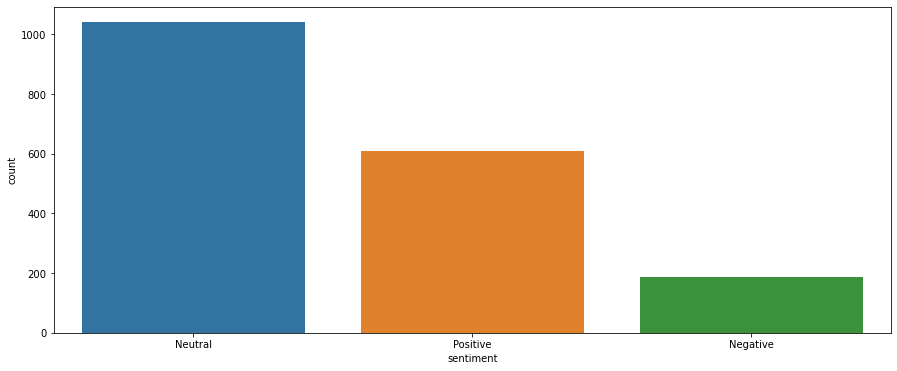

In [69]:
plt.figure(figsize=(15,6))
sns.countplot(elon_sentiment.sentiment) 

# Word cloud for Positive words

In [70]:
positive = []
negative = []
neutral = [] 

In [71]:
for i in range(0,len(elon)):
    
    for j in range(0,len(elon.absolute_clean_tweets[i].split() )):
        
        word = elon.absolute_clean_tweets[i].split()[j]
        if  word in affinity_scores:
            a = affinity_scores[word]
            if a > 0: 
                positive.append(word)
            elif a < 0:
                negative.append(word)
            else :
                neutral.append(word)
  

In [72]:
pos =' '.join(positive)

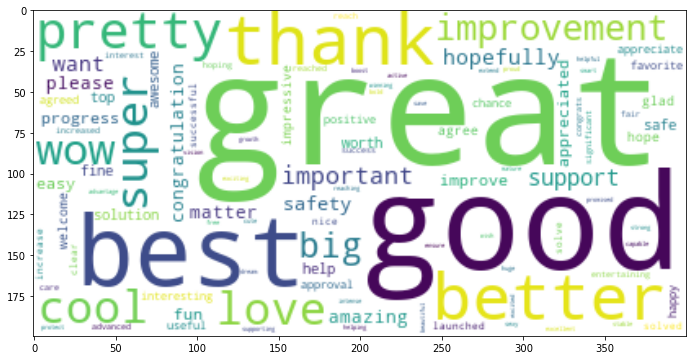

In [73]:
plt.figure(figsize=(18,6))
from wordcloud import WordCloud 
word_cloud = WordCloud(collocations = False, background_color = 'white' ).generate(pos)
plt.imshow(word_cloud, interpolation='bilinear')  

# Word cloud for Negative words

In [74]:
neg = ' '.join(negative)

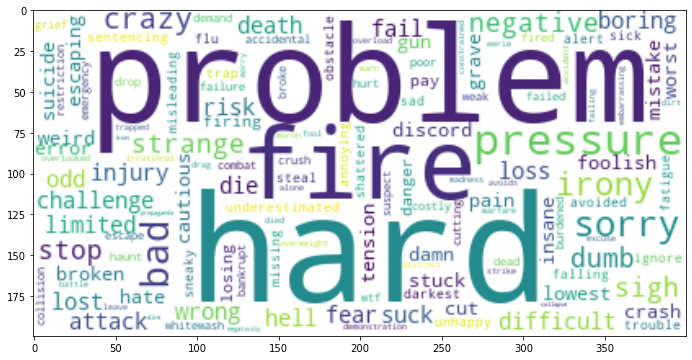

In [75]:
plt.figure(figsize=(18,6))
from wordcloud import WordCloud 
word_cloud = WordCloud(collocations = False, background_color = 'white' ).generate(neg)
plt.imshow(word_cloud, interpolation='bilinear') 

# Word cloud for All words 

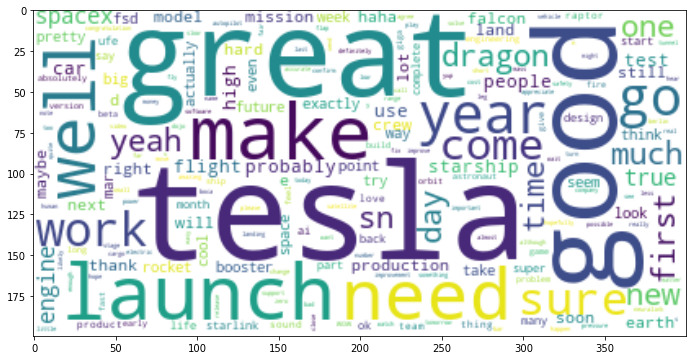

In [76]:
plt.figure(figsize=(18,6))
from wordcloud import WordCloud 
word_cloud = WordCloud(collocations = False, background_color = 'white' ).generate(clean_tweets)
plt.imshow(word_cloud, interpolation='bilinear') 

# Thank You 